# Statystyczne reguły decyzyjne

- Uladzislau Darhevich ud108519@student.sgh.waw.pl
- Maciej Morzywołek mm107854@student.sgh.waw.pl

## Praca domowa #2

###  Zadanie 1

Przeprowadziliśmy procedurę wyboru najlepszego modelu dla regresji LASSO. Przeprowadź taką samą analizę dla regresji grzbietowej i modelu Elastic-Net. Który z modeli jest najlepszy? Odpowiedź uzasadnij 

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

SEED = 42

In [29]:
# pobieranie danych
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat", 
                   sep = ' ', 
                   header=None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0


In [30]:
# podział danych na zmienne zmienne opisujące i zmienną celu
y = data[14]
X = data.loc[:, data.columns != 14]

In [31]:
# podział zbiorów na treningowy (70% obserwacji) i testowy (30% obserwacji)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=SEED)

### Regresja grzbietowa

$$\hat{\beta}^{ridge} = \underset{\beta}{\operatorname{argmin}}\{\sum_{i=1}^n(y_i - \beta_0 - \sum_{j-1}^k x_{ij}\beta_j)^2 + \lambda \sum_{j=1}^k \beta_j^2\}$$

gdzie $\lambda$ kontroluje wielkość kurczenia parametrów. Regresję grzbietową możemy zapisać też jako problem optymalizacyjny:

In [32]:
# weźmy kilka rożnych alpha
alphas = np.logspace(-3, 3, 20)

In [33]:
# do DataFram'u będziemy zbierać wyniki
res = pd.DataFrame(columns = ['alpha', 'accuracy'])

In [34]:
for alpha in alphas:
    clf = Ridge(alpha = alpha, normalize=True, random_state=SEED)
    clf.fit(X_train, y_train)
    y_pred = np.where(clf.predict(X_test) > 0.5, 1, 0)
    acc = accuracy_score(y_test, y_pred)
    res = res.append({'alpha' : alpha, 'accuracy': acc}, ignore_index=True)

In [35]:
res.sort_values(by='accuracy', ascending=False).head()

,alpha,accuracy
9,0.695193,0.884058
6,0.078476,0.874396
0,0.001000,0.869565
11,2.976351,0.869565
1,0.002069,0.869565


### Elastic-Net

<b> Elastic Net</b> jest metodą, która strara się łączyć zalety obu typów regularyzacji przy możliwie największym ograniczeniu ich wad. Polega ona na oszacowaniu kombinacji liniowej obu metod:

$$\hat{\beta}^{Elastic} = \underset{\beta}{\operatorname{argmin}}\{\frac{1}{2}\sum_{i=1}^n(y_i - \beta_0 - \sum_{j-1}^k x_{ij}\beta_j)^2 + \lambda \sum_{j=1}^k (\alpha|\beta_j| + (1-\alpha)\beta_j^2)\}$$

gdzie $\alpha \in (0,1)$

In [36]:
alphas = np.logspace(-3, 3, 20)
l1_ratio = np.linspace(0.1, 0.9, 9)

In [37]:
# do DataFram'u będziemy zbierać wyniki
res = pd.DataFrame(columns = ['alpha', 'l1_ratio', 'accuracy'])

In [38]:
for alpha in alphas:
    for l1 in l1_ratio:
        clf = ElasticNet(alpha = alpha, l1_ratio=l1, normalize=True, random_state=SEED)
        clf.fit(X_train, y_train)
        y_pred = np.where(clf.predict(X_test) > 0.5, 1, 0)
        acc = accuracy_score(y_test, y_pred)
        res = res.append({'alpha' : alpha, 'l1_ratio' : l1, 'accuracy': acc}, ignore_index=True)

In [39]:
res.sort_values(by='accuracy', ascending=False).head()

,alpha,l1_ratio,accuracy
19,0.004281,0.2,0.874396
18,0.004281,0.1,0.874396
31,0.008859,0.5,0.874396
5,0.001000,0.6,0.874396
28,0.008859,0.2,0.874396


## Zadanie 2

Na danych dostepnych [tutaj](https://raw.githubusercontent.com/bartoszpankratz/223490-0286-SRD-Zaoczne/master/data_ROC_PR.csv) oszacuj model regresji logistycznej i spróbuj ocenić jego trafność korzystając z krzywych <i>ROC</i> i <i>Precision-Recall</i>. Co zauważasz? <b>(5 pkt.)</b>

In [49]:
data = pd.read_csv("../data/data_slm/data_ROC_PR.csv")
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-2.101187,-0.247208,-1.989335,-1.484556,1.128668,-0.925564,1.210290,2.070526,0.091527,-2.376400,0
1,0.323703,-0.126894,-1.309524,-0.022738,-0.398725,0.280419,0.034598,1.184820,-0.186802,1.969326,0
2,-4.375435,0.334123,-0.852703,-2.701280,2.699135,-2.141198,-2.233844,-0.066448,-0.313881,1.499174,0
3,-1.537919,1.627132,0.484649,-1.020738,0.884990,-0.713543,0.943132,0.713558,-0.468041,0.075341,0
4,-3.240622,0.338141,-0.186530,-2.238088,1.786790,-1.455719,0.951526,0.398790,0.729005,0.372213,0


In [41]:
# podział danych na zmienne zmienne opisujące i zmienną celu
y = data['y']
X = data.loc[:, data.columns != 'y']

In [42]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [43]:
# podział zbiorów na treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = SEED)

In [44]:
# budowa modelu
lr = LogisticRegression(random_state=SEED, solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

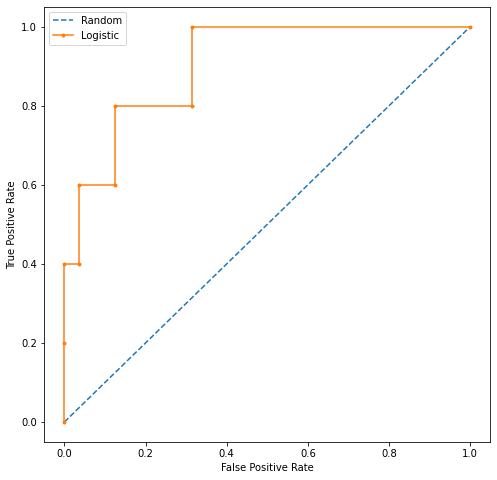

In [45]:
probas = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probas)
plt.figure(figsize=(8, 8)) 
plt.plot([0,1], [0,1], linestyle='--', label='Random')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [46]:
print("ROC_AUC score wynosi {}" .format(round(roc_auc_score(y_test, probas), 4)))

ROC_AUC score wynosi 0.9044


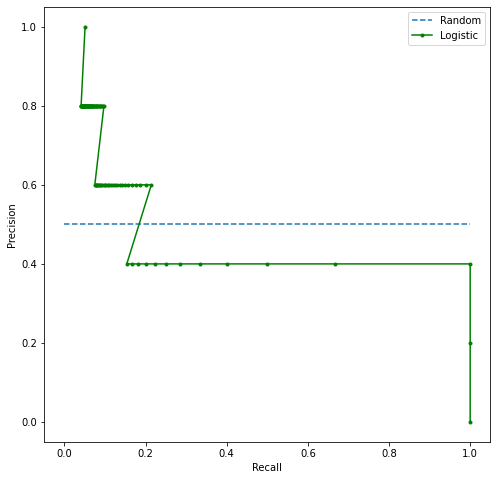

In [47]:
probas = lr.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probas)
plt.figure(figsize=(8, 8)) 
plt.plot([0, 1], [0.5, 0.5], linestyle='--', label='Random')
plt.plot(precision, recall, marker='.', label='Logistic', color = 'green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [48]:
print("Recall-precision_AUC score wynosi {}" .format(round(metrics.auc(recall, precision), 4)))

Recall-precision_AUC score wynosi 0.4633


Recall-precision_AUC score jest mniejszy niż 0.5. To znaczy, że ten model osiąga gorsze wyniki niż losowy klasyfikator. Należy zwrócić szczególną uwagę na dane wejściowe.